# __Tweets Clustering Experiment__

## __Data__

In [1]:
import pandas as pd
from modules import preprocessing as pp

In [2]:
tweets_df = pd.read_parquet('data/tweets/selected_tt_split.parquet')
tweets_df.shape

(1814599, 4)

In [4]:
tweets_df.head()

,author,user_description,tweet,hashtags
0,Indignado72,"“There are no coincidences, only the inevitable”",Cadê a cambada que dizia que era só uma gripez...,[BolsonaroGenocida]
1,EscutaZeNinguem,Mas quando a vida nos violentar\nPediremos ao ...,@seguezaqueu @zaqueusdvPT É porque a PF agora ...,[BolsonaroGenocida]
2,guinody,Só opinião que não vale nada.,@folhape @rbezerrademelo Não haverá segundo tu...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA..."
3,guinody,Só opinião que não vale nada.,@HaddadDebochado Não haverá segundo turno.\nNe...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA..."
4,Sandroka131,“O Brasil que come não conhece o Brasil que te...,@zehdeabreu @verabr1 Mais de 100 pedidos de im...,"[CPIdaCovid, GenocidaDesgracado]"


### Data Preprocessing

In [5]:
tweets_df['processed_tweet'] = tweets_df['tweet'].map(lambda x: pp.full_processing_pipeline(x))
tweets_df['keep_hashtags_tweet'] = tweets_df['tweet'].map(lambda x: pp.keep_hashtags_pipeline(x))
tweets_df['no_emoji_tweet'] = tweets_df['tweet'].map(lambda x: pp.no_emoji_pipeline(x))
tweets_df.head()

,author,user_description,tweet,hashtags,processed_tweet,keep_hashtags_tweet,no_emoji_tweet
0,Indignado72,"“There are no coincidences, only the inevitable”",Cadê a cambada que dizia que era só uma gripez...,[BolsonaroGenocida],cade cambada dizia gripezinha total casos tota...,cade cambada dizia gripezinha total casos tota...,cade cambada dizia gripezinha total casos tota...
1,EscutaZeNinguem,Mas quando a vida nos violentar\nPediremos ao ...,@seguezaqueu @zaqueusdvPT É porque a PF agora ...,[BolsonaroGenocida],porque pf agora anda ocupada tomando depoiment...,porque pf agora anda ocupada tomando depoiment...,porque pf agora anda ocupada tomando depoiment...
2,guinody,Só opinião que não vale nada.,@folhape @rbezerrademelo Não haverá segundo tu...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA...",havera segundo turno agora eleito primeiro tur...,havera segundo turno bolsonarogenocida lulasoc...,havera segundo turno agora eleito primeiro tur...
3,guinody,Só opinião que não vale nada.,@HaddadDebochado Não haverá segundo turno.\nNe...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA...",havera segundo turno agora eleito primeiro tur...,havera segundo turno bolsonarogenocida lulasoc...,havera segundo turno agora eleito primeiro tur...
4,Sandroka131,“O Brasil que come não conhece o Brasil que te...,@zehdeabreu @verabr1 Mais de 100 pedidos de im...,"[CPIdaCovid, GenocidaDesgracado]",pedidos impeachment segurados centrao anda qua...,pedidos impeachment segurados centrao cpidacov...,pedidos impeachment segurados centrao anda qua...


## __Clustering__

In [6]:
from wordcloud import WordCloud

### TF-IDF + KMeans

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

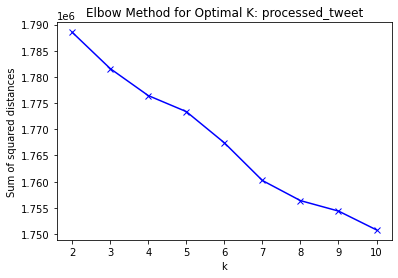

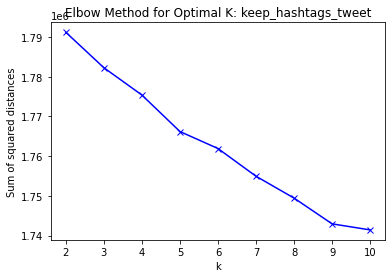

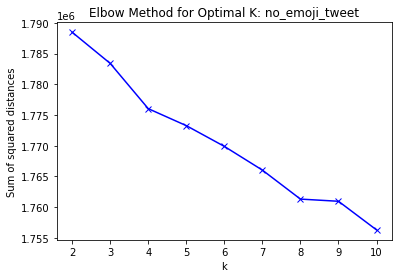

In [8]:
for proc_type in ['processed_tweet', 'keep_hashtags_tweet', 'no_emoji_tweet']:
    vec = TfidfVectorizer()
    vec.fit(tweets_df[proc_type])
    features = vec.transform(tweets_df[proc_type])

    sum_of_squared_distances = []
    for k in range(2,11):
        km = KMeans(n_clusters=k)
        km.fit(features)
        sum_of_squared_distances.append(km.inertia_)

    plt.plot(range(2,11), sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title(f'Elbow Method for Optimal K: {proc_type}')
    plt.show()


In [9]:
vec = TfidfVectorizer()
features = vec.fit_transform(tweets_df['no_emoji_tweet'])
#features = vec.transform(tweets_df[proc_type])

true_k = 5
model = KMeans(n_clusters=true_k)
model.fit(features)
labels = model.labels_

s_counts = pd.Series(labels).value_counts()
s_perc = pd.Series(labels).value_counts(normalize=True).values
for idx, val, perc in zip(s_counts.index, s_counts.values, s_perc):
    print(f'Cluster {idx}: {val} ({perc*100:.2f}%)')

Cluster 1: 1580473 (87.10%)
Cluster 3: 94846 (5.23%)
Cluster 4: 89099 (4.91%)
Cluster 2: 28221 (1.56%)
Cluster 0: 21960 (1.21%)


In [10]:
result = pd.DataFrame({'user': tweets_df['author'], 'tweet': tweets_df['no_emoji_tweet'], 'hashtags':tweets_df['hashtags'] ,'cluster':labels})

In [11]:
for x in range(0, true_k):
    cluster_data = result[result['cluster']==x]
    hashtags_ = []
    for h_list in cluster_data['hashtags']:
        for ht in h_list:
            hashtags_.append(ht)
    s_counts_ = pd.Series(hashtags_).value_counts()[:15]
    s_perc_ = pd.Series(hashtags_).value_counts(normalize=True)[:15]
    print(f'\nCluster {x} top 15 hashtags:\n')
    for idx, val, perc in zip(s_counts_.index, s_counts_.values, s_perc_.values):
        print(f'#{idx}: {val} ({perc*100:.2f}%)')


Cluster 0 top 15 hashtags:

#ForaBolsonaro: 12842 (35.37%)
#ForaBolsonaroGenocida: 3174 (8.74%)
#RenanVagabundo: 1833 (5.05%)
#CPIdaCovid: 1489 (4.10%)
#EuAutorizoPresidente: 1154 (3.18%)
#RenanSabiaDeTudo: 1024 (2.82%)
#29MForaBolsonaro: 864 (2.38%)
#forabolsonaro: 616 (1.70%)
#BolsonaroGenocida: 532 (1.47%)
#LulaPresidente2022: 361 (0.99%)
#FORABOLSONARO: 347 (0.96%)
#CPIdoCirco: 331 (0.91%)
#CPIdaPandemia: 316 (0.87%)
#ForaGenocida: 298 (0.82%)
#3JForaBolsonaro: 280 (0.77%)

Cluster 1 top 15 hashtags:

#ForaBolsonaro: 477903 (16.97%)
#CPIdaCovid: 464940 (16.51%)
#ForaBolsonaroGenocida: 128902 (4.58%)
#CPIdaPandemia: 114281 (4.06%)
#RenanVagabundo: 100212 (3.56%)
#CPIdoCirco: 88635 (3.15%)
#RenanSabiaDeTudo: 76484 (2.72%)
#EuAutorizoPresidente: 74173 (2.63%)
#BolsonaroGenocida: 47801 (1.70%)
#CPIdoGenocidio: 40345 (1.43%)
#forabolsonaro: 34079 (1.21%)
#CPIdaCOVID19: 33342 (1.18%)
#COVID19: 22755 (0.81%)
#ImpeachmentBolsonaroUrgente: 20543 (0.73%)
#CPIdaCOVID: 18793 (0.67%)

Cluster 

In [12]:
result.query('cluster == 0').sample(15)

,user,tweet,hashtags,cluster
1274376,KarolPMesqta,bom dia quarta muitas boas surpresas,[ForaBolsonaro],0
475866,chrisysax,bom dia site,[ForaBolsonaro],0
971035,Claudia00404957,bom dia,[RenanSabiaDeTudo],0
86269,DenizeBocchi5,bom dia lula presidente,[ForaBolsonaro],0
263023,sansey_secXXI,bom dia,[ForaBolsonaro],0
1498636,Edelsvitha,bom dia,[ForaBolsonaro],0
1286255,rafaeh_,dia luta dia luta,"[ForaBolsonaroGenocida, 24J]",0
833306,BitucaSalim,dia bolsonaro,[ForaBolsonaro],0
478680,brasilmarie,bom dia,[ForaBolsonaroGenocida],0
602397,gutolima69,bom dia,[ForaBolsonaro],0


In [13]:
result.query('cluster == 1').sample(15)

,user,tweet,hashtags,cluster
308162,cpeixotojr,ai abaixo depondo dizendo fez declaracoes cont...,"[CPIdoGenocidio, CPIdaCovid]",1
425239,Jodhami,agora rogerio carvalho deu golpe certeiro hoje...,[CPIdaCOVID],1
40337,AAnaaLLaauraa,maio povo resposta presidente bolsonaro espera...,[EuAutorizoPresidente],1
1511630,BelmaVaz,perde ainda dignidade ainda apoia desgoverno p...,"[forabolsonaro, forabolsonaro, Vergonha]",1
130792,claudiofalatudo,sera possivel,"[SERBANDIDOCOMPENSA, tratamentoprecocemata, CP...",1
1384368,EdnalvaSantosG2,parabens coragem luta povo patria brasil verda...,[ForaBolsonaro],1
1235126,verapIace,girao citou consorcio nordeste hoje sim,[CPIdaCovid],1
561395,ADVCCO,medica hein deus,[CPIdaPandemia],1
1022136,ThanyaMotta,outros,[RenanSabiaDeTudo],1
1465405,Cristina_CMota,omar simplesmente ignorando depoente hoje haha...,[CPIdaCovid],1


In [14]:
result.query('cluster == 2').sample(15)

,user,tweet,hashtags,cluster
1178329,ptribeirao,movimento pede tempo discutir pedagio rodovia ...,"[3JForaBolsonaro, CPIdaCOVID, RéuConfesso]",2
1271840,ptribeirao,soberana plus soberana plus cuba eficacia cont...,"[24JForaBolsonaro, CPIdaCOVID, RéuConfesso]",2
1409857,ptribeirao,filha roberto jefferson cobra bolsonaro apos p...,"[ForaBolsonaro, LulaLivreBrasilLivre]",2
1379477,ptribeirao,cade braco social estado gilvander moreira nuc...,"[ForaBolsonaro, LulaLivreBrasilLivre]",2
1144565,ptribeirao,desbolsonarizar democracia desmorizar justica ...,"[3JForaBolsonaro, CPIdaCOVID, RéuConfesso]",2
1366976,ptribeirao,semipresidencialismo consideracoes oportunidad...,"[ForaBolsonaro, LulaLivreBrasilLivre]",2
1308061,ptribeirao,fhc declara voto joao doria pre candidato pres...,"[ForaBolsonaro, LulaLivreBrasilLivre]",2
1350490,ptribeirao,tribunais bolsonaro disputam comando pf nucleo...,"[ForaBolsonaro, LulaLivreBrasilLivre]",2
1135778,ptribeirao,veja intervencao pco reuniao frente brasil pop...,"[3JForaBolsonaro, CPIdaCOVID, RéuConfesso]",2
1128932,ptribeirao,dados israel pergunta variante delta escapa va...,"[3JForaBolsonaro, CPIdaCOVID, RéuConfesso]",2


In [15]:
result.query('cluster == 3').sample(15)

,user,tweet,hashtags,cluster
454116,aprizion,mes funcionamento cpi investigou busca vacinas...,"[CPIdaPandemia, CPIdaCovid, Aprizion]",3
518684,home_nanda,incrivel milagre faz negacionistas irem cpi de...,[ForaBolsonaro],3
202112,Josembe21663154,cpi infratores,[RenanVagabundo],3
435448,wagnerjs70,parabens trabalhos palco pro novo rolando lero...,[CPIdaCovid],3
402922,leoalvesrc,cpi escancarou atuacao criminosa bolsonaro enf...,[ForaBolsonaro],3
1223100,comunistaexaust,sextou cpi,[CPIdaCovid],3
1090093,thantz,corrente cpi pai omar aziz mae simone tebet ir...,[CPIdaCovid],3
1172074,DiegoHA_oficial,forcas armadas prometem reacao dura caso cpi v...,"[ForcasArmadas, CPIdoCirco]",3
111789,CUT_Brasil,questao vacinas deve consolidar principais mai...,[CPIdaCovid],3
1030960,danteli34268202,bomba cpi morte lazaro barbosa via,[RENANSABIADETUDO],3


In [16]:
result.query('cluster == 4').sample(15)

,user,tweet,hashtags,cluster
1625973,deda_deda21,vai vendo ministro queiroga valentao ny mostr...,"[ForaBolsonaroGenocida, ForaBolsonaro, ForaQue...",4
1215347,dulcinealisboa,dai vai fazer manchete china ataca eua hipocri...,"[CPIdaCovid, NoMasBloqueoACuba]",4
222457,AlxandreCunha,gente parada vai dar senador vai ficar super c...,[RenanVagabundo],4
348409,AlbertodeReis1,pazuzu vai penar amanha,[CPIdaCovid],4
718914,MarcioPdeAssis,retrocesso vc ainda estar solto falando merda ...,"[golpe16, DeltanNaCadeia, ForaBolsonaro, Lula2...",4
772724,nelio_cristiano,vergonha to sentindo vcs perderam senso ridicu...,"[BolsonaroOrgulhoDoBrasil, LulaLadrao, STFVerg...",4
1343750,leandro_1duarte,sen deixa rancho queimado falar senao vai atra...,"[CPIdaCovid, CPIdaCovid, CPIdaCovid, SenadoCon...",4
230296,KiinhoBriito,boa governador coloca lugar veio maceio pra au...,"[genocida, Vergonha, Presidente, ForaBolsonaro]",4
909007,CleberOJ,bolsonaro vai cair corrupto,[CPIdaCovid],4
1545772,Flaviiaax,ei bolsonaro vai tomar cu presidente merda,"[ForaBolsonaroGenocida, Bolsonaroacabou]",4


In [17]:
#result.query('cluster == 5').sample(15)

In [18]:
#result.query('cluster == 6').sample(15)

In [19]:
#result.query('cluster == 7').sample(15)

Cluster :  0


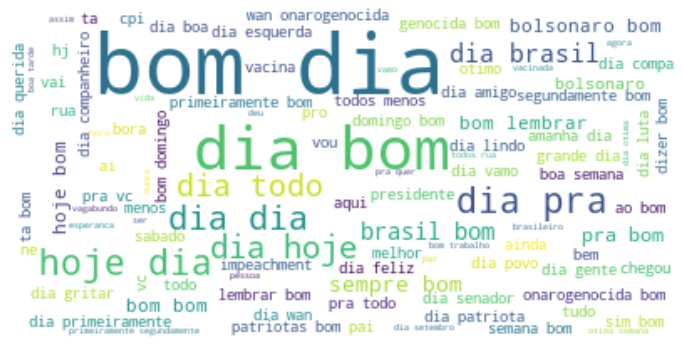

Cluster :  1


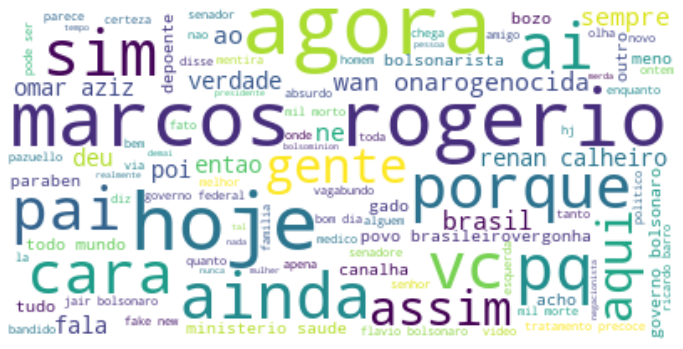

Cluster :  2


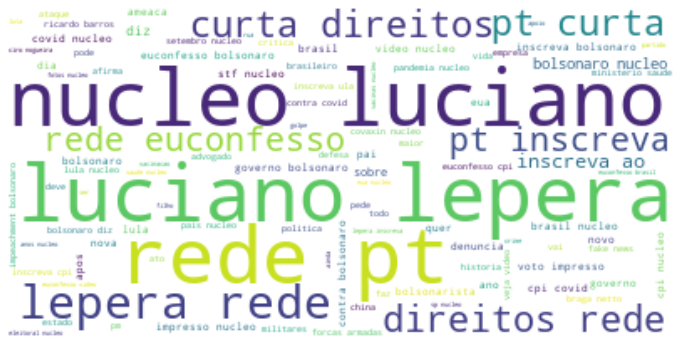

Cluster :  3


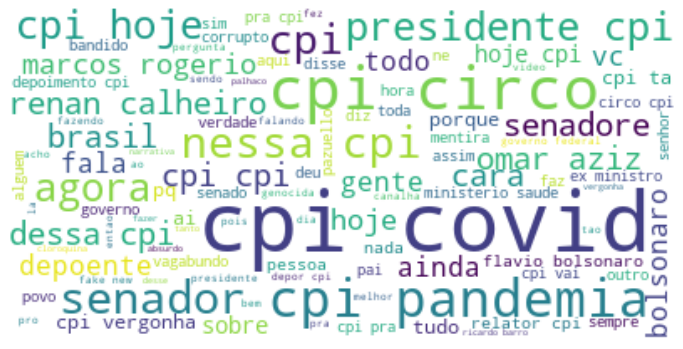

Cluster :  4


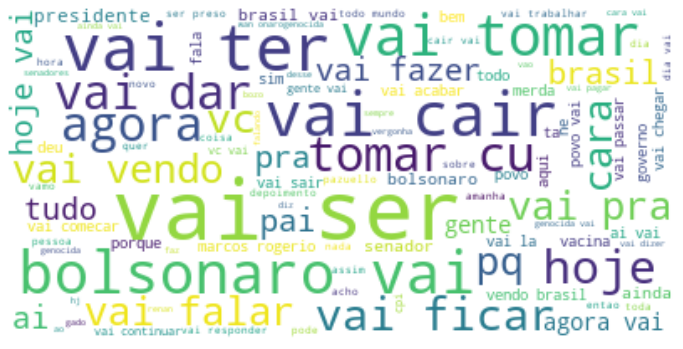

In [20]:
for k in range(0, true_k):
    s = result[result['cluster']==k]
    text = s['tweet'].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
    print('Cluster : ', k)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Embeddings (Transformers) + KMeans

In [21]:
from sentence_transformers import SentenceTransformer

#model = SentenceTransformer('adalbertojunior/distilbert-portuguese-cased')
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

/home/lucas/anaconda3/envs/twitter-cpi/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: 100%|████████████████████████████████████████| 690/690 [00:00<00:00, 335kB/s]
Downloading: 100%|████████████████████████████████████| 2.38k/2.38k [00:00<00:00, 855kB/s]
Downloading: 100%|████████████████████████████████████████| 341/341 [00:00<00:00, 110kB/s]
Downloading: 100%|█████████████████████████████████████| 539M/539M [01:07<00:00, 7.99MB/s]
Downloading: 100%|█████████████████████████████████████| 53.0/53.0 [00:00<00:00, 28.1kB/s]
Downloading: 100%|████████████████████████████████████████| 112/112 [00:00<00:00, 110kB/s]
Downloading: 100%|████████████████████████████████████| 1.96M/1.96M [00:03<00:00, 532kB/s]
Downloading: 100%|████████████████████████████████████████| 452/452 [00:00<00:00, 340kB/s]


In [22]:
#embeddings = model.encode(tweets_df['keep_hashtags_tweet'], show_progress_bar=True)
embeddings = model.encode(tweets_df['processed_tweet'], show_progress_bar=True)

Batches: 100%|███████████████████████████████████| 56707/56707 [12:59:35<00:00,  1.21it/s]


In [23]:
sum_of_squared_distances = []
for k in range(2,11):
   print('Clustering K = ', k)
   km = KMeans(n_clusters=k)
   km.fit(embeddings)
   sum_of_squared_distances.append(km.inertia_)

Clustering K =  2
Clustering K =  3
Clustering K =  4
Clustering K =  5
Clustering K =  6
Clustering K =  7
Clustering K =  8
Clustering K =  9
Clustering K =  10


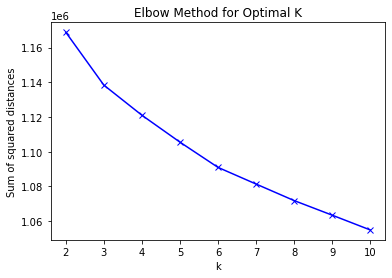

In [24]:
plt.plot(range(2,11), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [25]:
true_k = 3
model = KMeans(n_clusters=true_k)
model.fit(features)
labels = model.labels_


s_counts = pd.Series(labels).value_counts()
s_perc = pd.Series(labels).value_counts(normalize=True).values
for idx, val, perc in zip(s_counts.index, s_counts.values, s_perc):
    print(f'Cluster {idx}: {val} ({perc*100:.2f}%)')

Cluster 0: 1585760 (87.39%)
Cluster 1: 206802 (11.40%)
Cluster 2: 22037 (1.21%)


In [26]:
result = pd.DataFrame({'user': tweets_df['author'], 'tweet': tweets_df['keep_hashtags_tweet'], 'hashtags':tweets_df['hashtags'] ,'cluster':labels})

In [27]:
for x in range(0, true_k):
    cluster_data = result[result['cluster']==x]
    hashtags_ = []
    for h_list in cluster_data['hashtags']:
        for ht in h_list:
            hashtags_.append(ht)
    s_counts_ = pd.Series(hashtags_).value_counts()[:15]
    s_perc_ = pd.Series(hashtags_).value_counts(normalize=True)[:15]
    print(f'\nCluster {x} top 15 hashtags:\n')
    for idx, val, perc in zip(s_counts_.index, s_counts_.values, s_perc_.values):
        print(f'#{idx}: {val} ({perc*100:.2f}%)')


Cluster 0 top 15 hashtags:

#CPIdaCovid: 482425 (17.10%)
#ForaBolsonaro: 442370 (15.68%)
#CPIdaPandemia: 122255 (4.33%)
#ForaBolsonaroGenocida: 119171 (4.22%)
#RenanVagabundo: 105279 (3.73%)
#CPIdoCirco: 99603 (3.53%)
#RenanSabiaDeTudo: 81469 (2.89%)
#EuAutorizoPresidente: 69051 (2.45%)
#BolsonaroGenocida: 43780 (1.55%)
#CPIdoGenocidio: 42568 (1.51%)
#CPIdaCOVID19: 35769 (1.27%)
#forabolsonaro: 31082 (1.10%)
#CPIdaCOVID: 29180 (1.03%)
#COVID19: 22908 (0.81%)
#ImpeachmentBolsonaroUrgente: 17740 (0.63%)

Cluster 1 top 15 hashtags:

#ForaBolsonaro: 81260 (20.27%)
#CPIdaCovid: 58512 (14.59%)
#ForaBolsonaroGenocida: 22701 (5.66%)
#CPIdaPandemia: 14587 (3.64%)
#BolsonaroGenocida: 9311 (2.32%)
#EuAutorizoPresidente: 7879 (1.97%)
#RenanVagabundo: 7162 (1.79%)
#CPIdoCirco: 6644 (1.66%)
#CPIdoGenocidio: 6048 (1.51%)
#forabolsonaro: 5035 (1.26%)
#CPIdaCOVID: 4926 (1.23%)
#ImpeachmentBolsonaroUrgente: 4845 (1.21%)
#RenanSabiaDeTudo: 4232 (1.06%)
#CPIdaCOVID19: 3388 (0.85%)
#BolsonaroVaiCair: 3227